In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=pd.read_csv("osteoporosisfinal.csv")
print(data)

           Id  Age  Gender         Hormone FHistory              Race  \
0     1734616   69  Female          Normal      Yes             Asian   
1     1419098   32  Female          Normal      Yes             Asian   
2     1797916   89  Female  Postmenopausal       No         Caucasian   
3     1805337   78  Female          Normal       No         Caucasian   
4     1351334   38    Male  Postmenopausal      Yes  African American   
...       ...  ...     ...             ...      ...               ...   
1953  1991635   19  Female          Normal      Yes  African American   
1954  1528601   23  Female  Postmenopausal      Yes         Caucasian   
1955  1990957   34  Female  Postmenopausal       No  African American   
1956  1779848   25    Male  Postmenopausal       No  African American   
1957  1282963   26  Female  Postmenopausal       No  African American   

           Weight CalciumIn   Activity Smoking          MedCondition  \
0     Underweight       Low  Sedentary     Yes  Rhe

<Axes: >

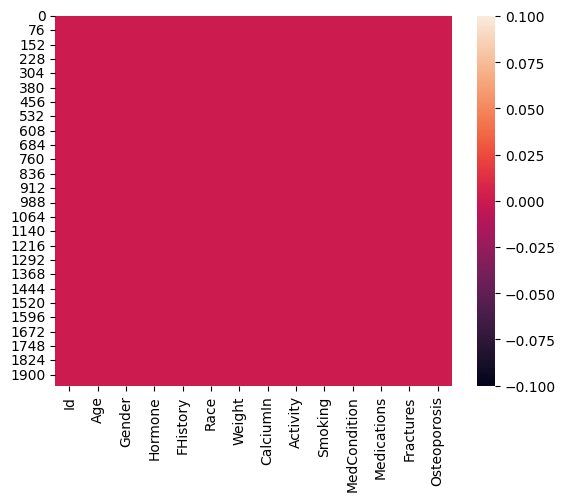

In [10]:
sns.heatmap(data.isnull())

In [11]:
data_final=data.drop(['Id',"Race","Medications"],axis=1)
print(data_final)

      Age  Gender         Hormone FHistory       Weight CalciumIn   Activity  \
0      69  Female          Normal      Yes  Underweight       Low  Sedentary   
1      32  Female          Normal      Yes  Underweight       Low  Sedentary   
2      89  Female  Postmenopausal       No       Normal  Adequate     Active   
3      78  Female          Normal       No  Underweight  Adequate  Sedentary   
4      38    Male  Postmenopausal      Yes       Normal       Low     Active   
...   ...     ...             ...      ...          ...       ...        ...   
1953   19  Female          Normal      Yes       Normal  Adequate  Sedentary   
1954   23  Female  Postmenopausal      Yes  Underweight       Low     Active   
1955   34  Female  Postmenopausal       No  Underweight       Low  Sedentary   
1956   25    Male  Postmenopausal       No       Normal       Low  Sedentary   
1957   26  Female  Postmenopausal       No  Underweight  Adequate  Sedentary   

     Smoking          MedCondition Frac

<Axes: >

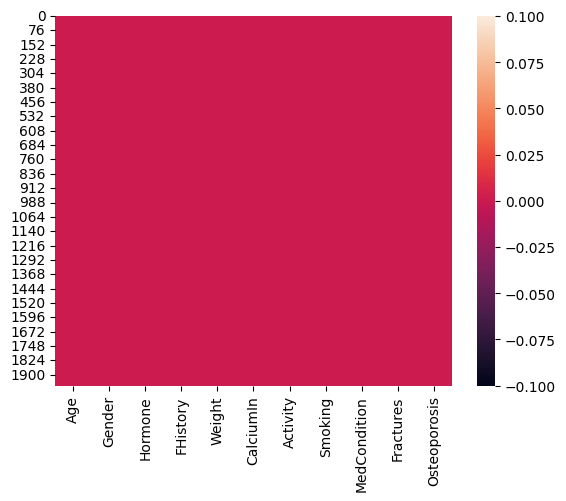

In [12]:
sns.heatmap(data_final.isnull())

In [13]:
data_final=data_final.dropna()

<Axes: >

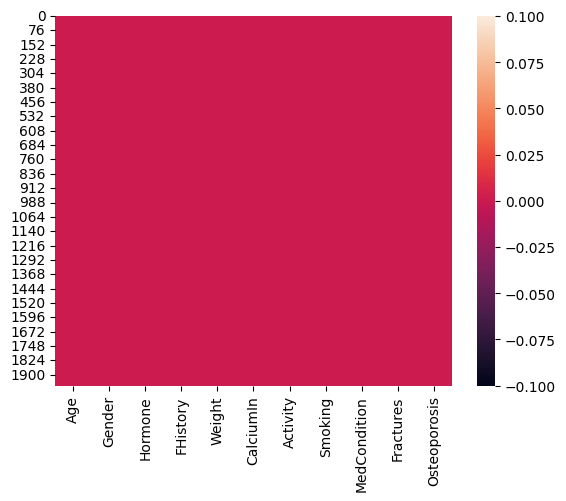

In [14]:
sns.heatmap(data_final.isnull())

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_final['Gender']=le.fit_transform(data_final['Gender'])
data_final['Hormone']=le.fit_transform(data_final['Hormone'])
data_final['FHistory']=le.fit_transform(data_final['FHistory'])
data_final['Weight']=le.fit_transform(data_final['Weight'])
data_final['CalciumIn']=le.fit_transform(data_final['CalciumIn'])
data_final['Activity']=le.fit_transform(data_final['Activity'])
data_final['Smoking']=le.fit_transform(data_final['Smoking'])
data_final['MedCondition']=le.fit_transform(data_final['MedCondition'])
data_final['Fractures']=le.fit_transform(data_final['Fractures'])
print(data_final)

      Age  Gender  Hormone  FHistory  Weight  CalciumIn  Activity  Smoking  \
0      69       0        0         1       1          1         1        1   
1      32       0        0         1       1          1         1        0   
2      89       0        1         0       0          0         0        0   
3      78       0        0         0       1          0         1        1   
4      38       1        1         1       0          1         0        1   
...   ...     ...      ...       ...     ...        ...       ...      ...   
1953   19       0        0         1       0          0         1        1   
1954   23       0        1         1       1          1         0        0   
1955   34       0        1         0       1          1         1        0   
1956   25       1        1         0       0          1         1        1   
1957   26       0        1         0       1          0         1        1   

      MedCondition  Fractures  Osteoporosis  
0                

In [16]:
x=data_final.iloc[:,:-1].values
y=data_final.iloc[:,-1].values

D:\Downloads\python3.11\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


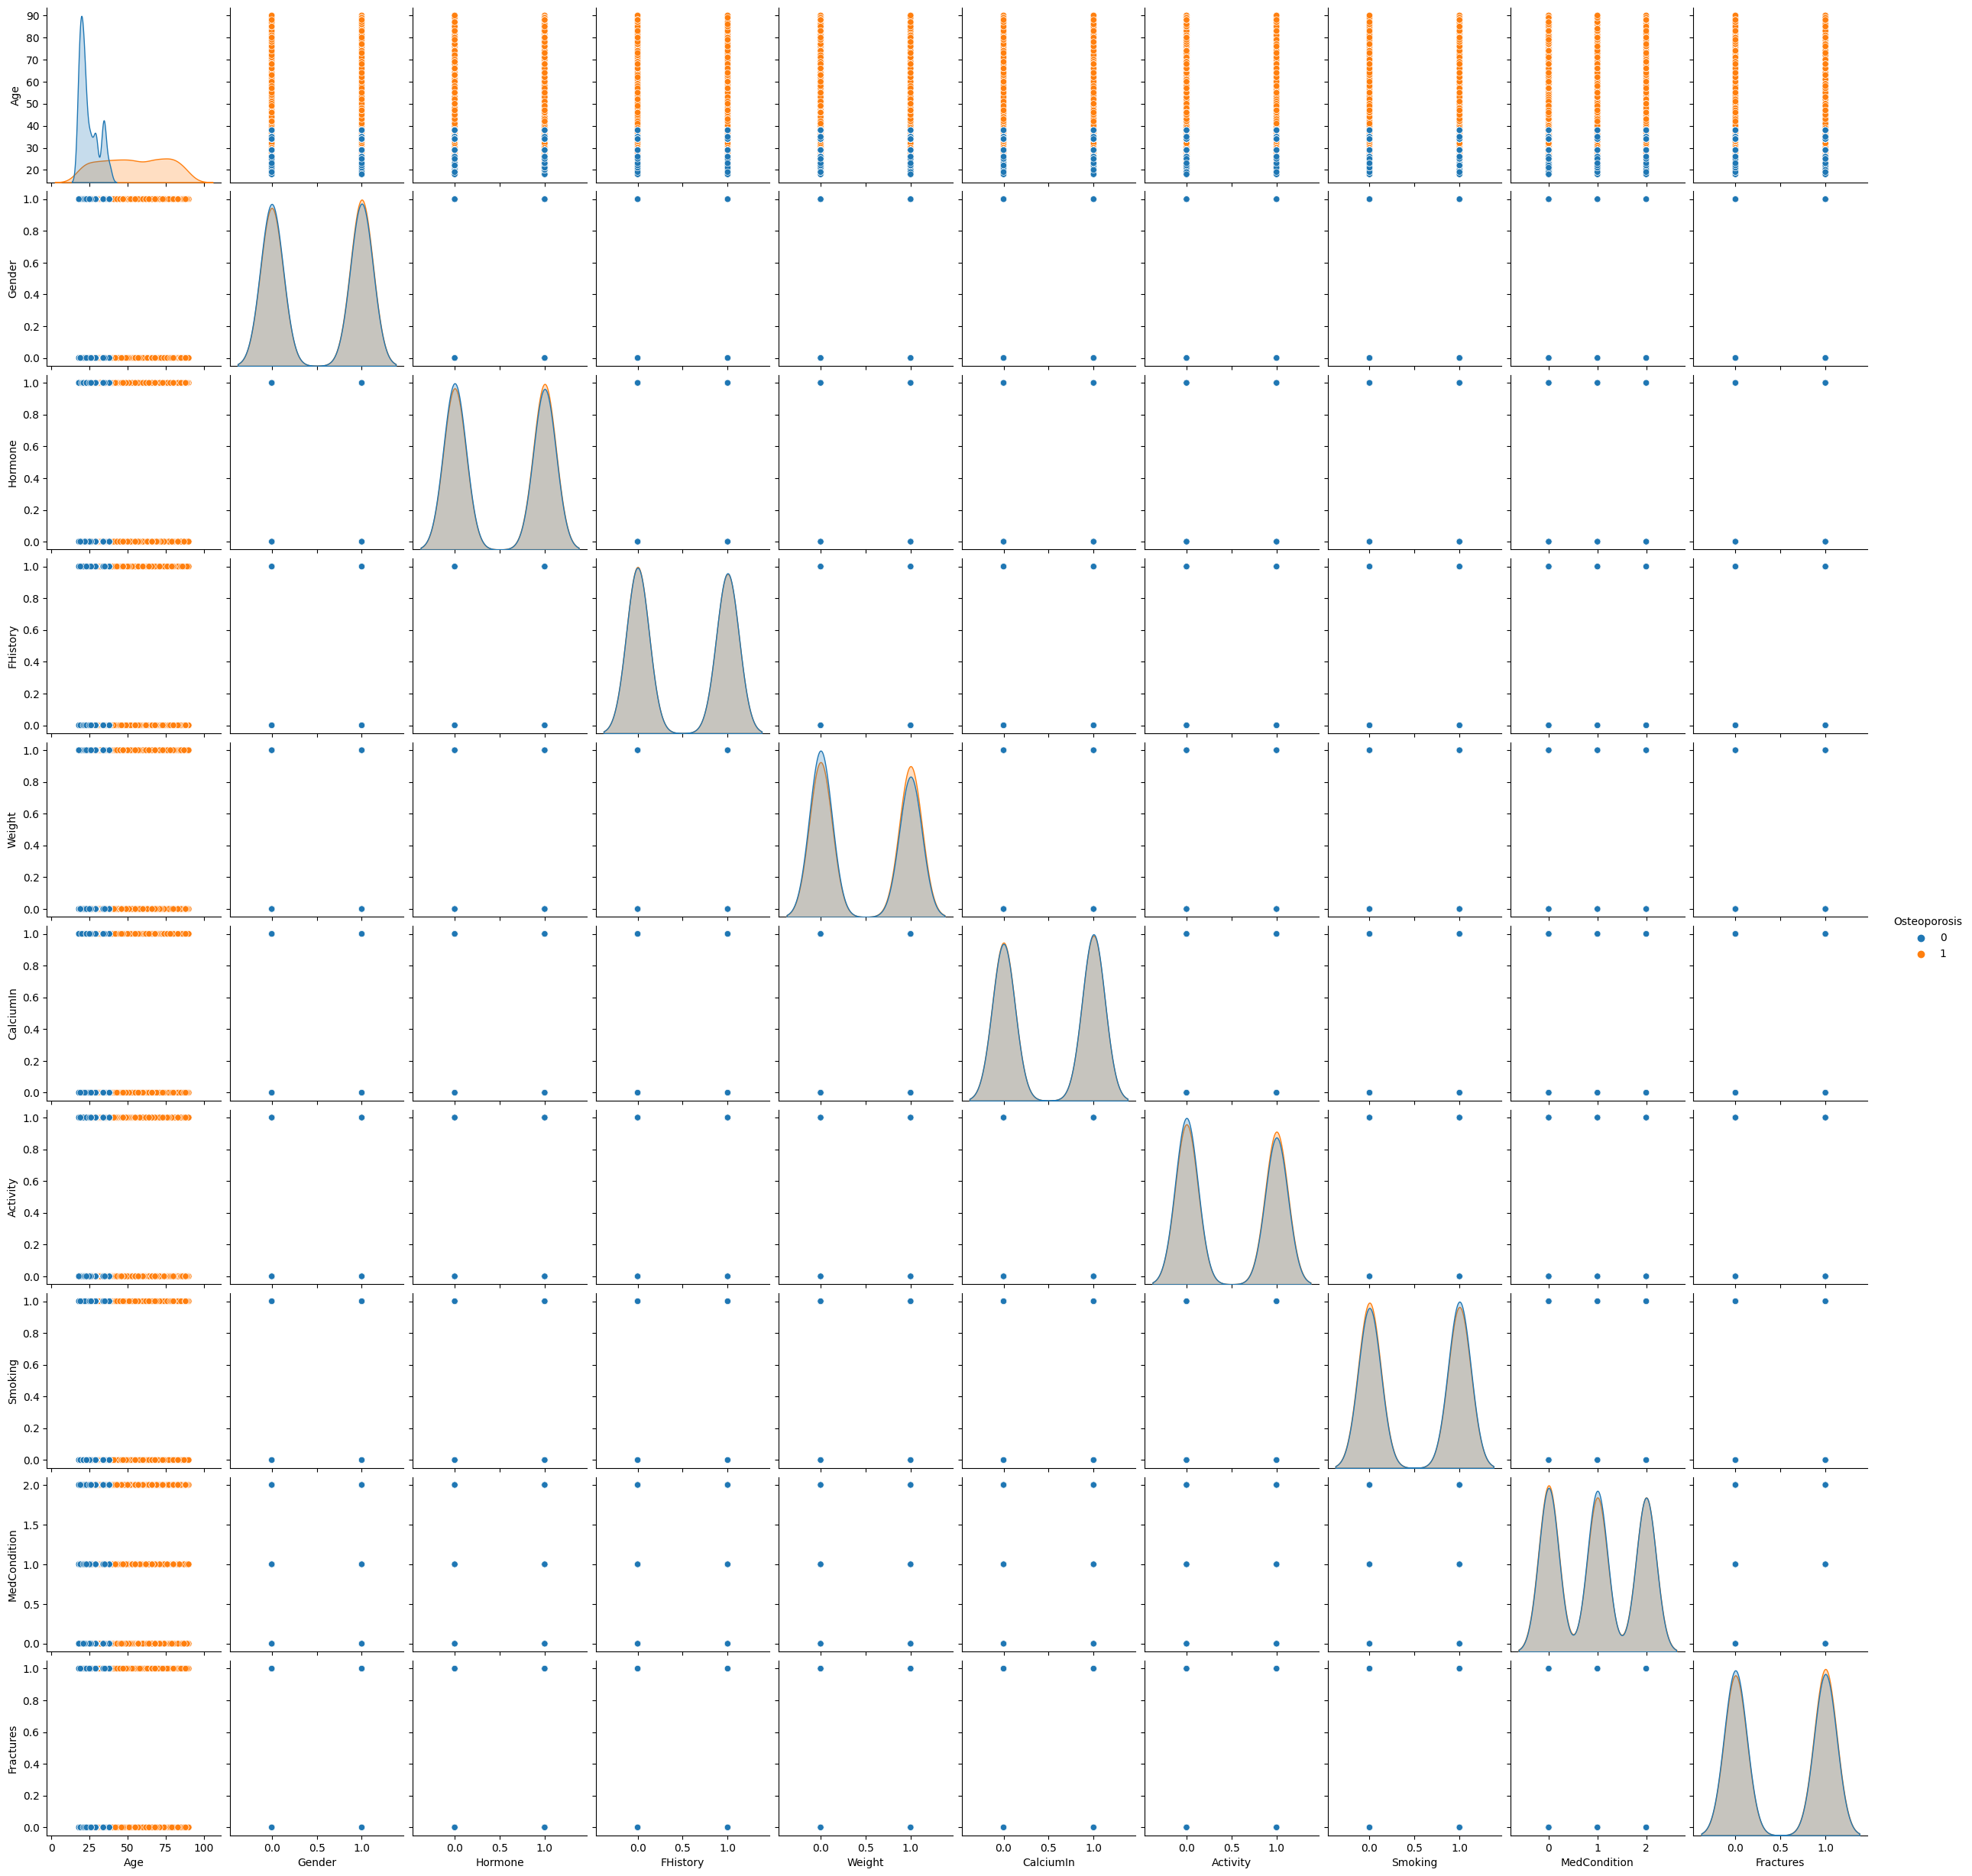

In [17]:
sns.pairplot(data_final,hue="Osteoporosis")

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

<Axes: >

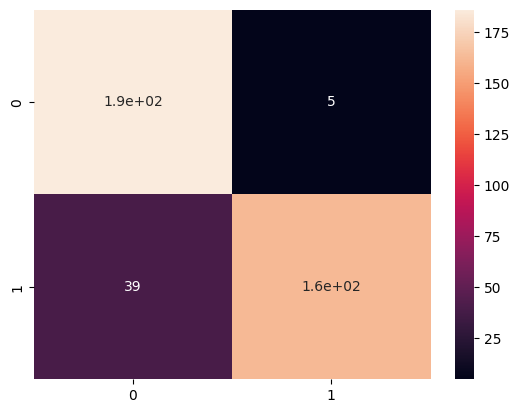

In [21]:
from sklearn.metrics import confusion_matrix
knn_pred = knn.predict(x_test)
knncm=confusion_matrix(y_test,knn_pred)
sns.heatmap(knncm,annot=True)

In [22]:
from sklearn.metrics import classification_report
knncr=classification_report(y_test,knn_pred)
print(knncr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       191
           1       0.97      0.81      0.88       201

    accuracy                           0.89       392
   macro avg       0.90      0.89      0.89       392
weighted avg       0.90      0.89      0.89       392



In [23]:
from sklearn.linear_model import LogisticRegression
logm=LogisticRegression()
logm.fit(x_train,y_train)

LogisticRegression()

In [24]:
logm_pred=logm.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
logmas=accuracy_score(y_test,logm_pred)
print(logmas)

0.8392857142857143


<Axes: >

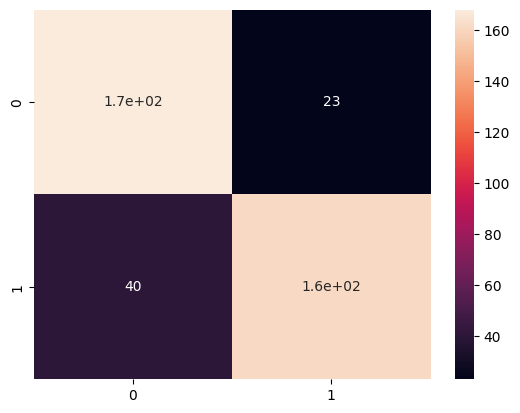

In [26]:
logmcm=confusion_matrix(y_test,logm_pred)
sns.heatmap(logmcm,annot=True)

In [27]:
logmcr=classification_report(y_test,logm_pred)
print(logmcr)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       191
           1       0.88      0.80      0.84       201

    accuracy                           0.84       392
   macro avg       0.84      0.84      0.84       392
weighted avg       0.84      0.84      0.84       392



In [28]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)


GaussianNB()

In [29]:
nb_pred=nb.predict(x_test)
nbas=accuracy_score(y_test,nb_pred)
print(nbas)

0.8724489795918368


<Axes: >

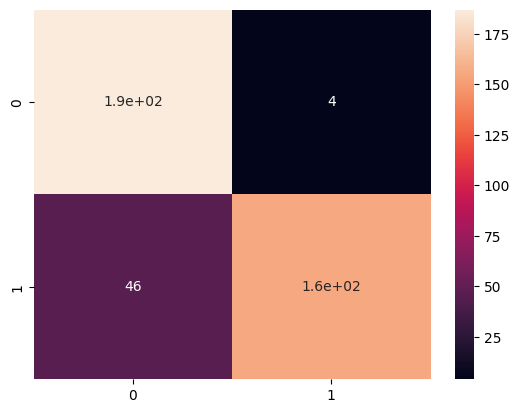

In [30]:
nbcm=confusion_matrix(y_test,nb_pred)
sns.heatmap(nbcm,annot=True)


In [31]:
nbcr=classification_report(y_test,nb_pred)
print(nbcr)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       191
           1       0.97      0.77      0.86       201

    accuracy                           0.87       392
   macro avg       0.89      0.88      0.87       392
weighted avg       0.89      0.87      0.87       392



In [32]:
from sklearn.svm import SVC
svmmodel=SVC(kernel="linear")
svmmodel.fit(x_train,y_train)

SVC(kernel='linear')

In [33]:
svmmodel_pred=svmmodel.predict(x_test)
svmas=accuracy_score(y_test,svmmodel_pred)
print(svmas)

0.8545918367346939


<Axes: >

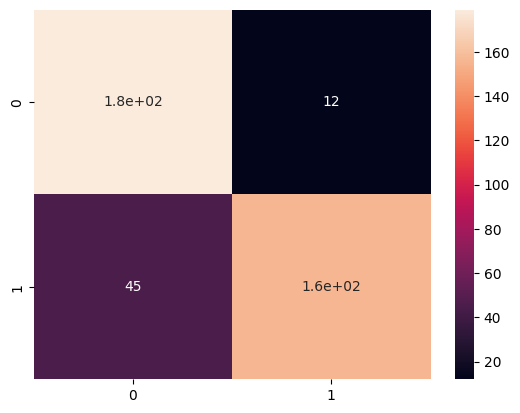

In [34]:
svmcr=confusion_matrix(y_test,svmmodel_pred)
sns.heatmap(svmcr,annot=True)

In [35]:
from sklearn.metrics import classification_report
svmcr=classification_report(y_test,svmmodel_pred)
print(svmcr)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       191
           1       0.93      0.78      0.85       201

    accuracy                           0.85       392
   macro avg       0.86      0.86      0.85       392
weighted avg       0.87      0.85      0.85       392



In [37]:
import joblib
joblib.dump(knncm, "osteoporosis_model.pkl")

['osteoporosis_model.pkl']